In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#### IMPORT countUserid.csv FROM GITHUB
# this data is based on the original dataset interactions.csv
#  - userID: list of distinct userID 
#  - interaction: number of interactions by each user

user = pd.read_csv('https://raw.githubusercontent.com/nyu-big-data/final-project-team-deep-coral/master/working_files/countUserid_.csv?token=AJOTDOAKCIL2644ZDKRI46K6W64PA', header=None)
user.columns = ['userID', '#interaction']

In [86]:
user.sort_values('userID').describe()

,userID,#interaction
count,876145.000000,876145.000000
mean,438072.000000,260.970892
std,252921.420136,746.828228
min,0.000000,1.000000
25%,219036.000000,32.000000
50%,438072.000000,100.000000
75%,657108.000000,265.000000
max,876144.000000,119777.000000


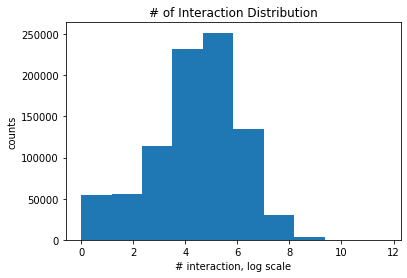

In [92]:
plt.hist(np.log(user['#interaction']))
plt.xlabel("# interaction, log scale")
plt.ylabel("counts")
plt.title("# of Interaction Distribution")
plt.show()

In [39]:
total = np.sum(user['#interaction'])

nums = [10, 20, 30]
for num in nums:
    fewer10 = user[user['#interaction'] < num]
    print("discard fewer than {0}: {1} interaction ({2}%) discarded".
          format(num, np.sum(fewer10['#interaction']), round(np.sum(fewer10['#interaction']) / total * 100, 3)))

discard fewer than 10: 400218 interaction (0.175%) discarded
discard fewer than 20: 1102822 interaction (0.482%) discarded
discard fewer than 30: 2374285 interaction (1.038%) discarded


### >> drop users with less than 30 interactions 
#### (25% of users have interactions less than 30, and their interactions only accounts for 1.04% of our total interactions.)

In [48]:
more30 = user[user['#interaction'] > 30]
more30.describe()

,userID,#interaction
count,666375.000000,666375.000000
mean,366637.996889,339.344089
std,240909.205788,841.217549
min,0.000000,31.000000
25%,166629.500000,75.000000
50%,333260.000000,156.000000
75%,546057.500000,351.000000
max,876144.000000,119777.000000


In [103]:
more30_id170000 = more30[more30['userID']<5000]
display(more30_id170000.describe())
print(np.sum(more30_id170000, axis=0)[1] / np.sum(more30, axis=0)[1])

,userID,#interaction
count,4995.000000,4995.000000
mean,2501.938138,503.270270
std,1442.182455,828.739668
min,0.000000,41.000000
25%,1253.500000,161.000000
50%,2502.000000,276.000000
75%,3750.500000,554.000000
max,4999.000000,30072.000000


0.011116748615025991


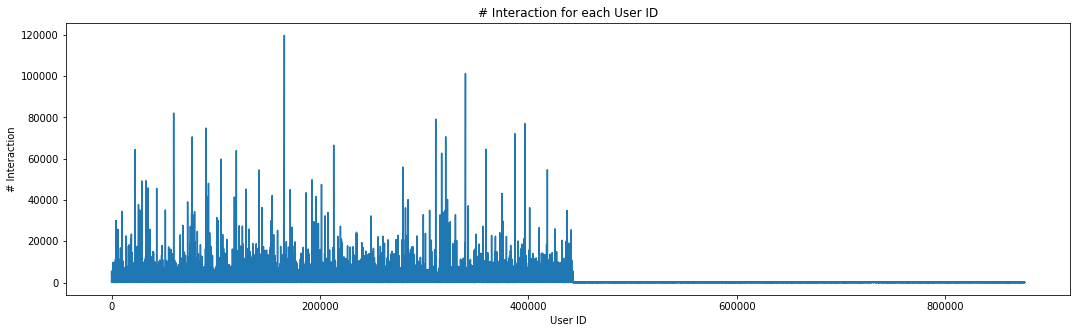

In [93]:
more30 = more30.sort_values('userID')
plt.figure(figsize=(18,5))
plt.plot(more30.userID, more30['#interaction'])
plt.xlabel('User ID')
plt.ylabel('# Interaction')
plt.title("# Interaction for each User ID")
plt.show()

UserID greater than 450000 are new users with comparatively few interactions. Apart from that, the distribution does not have particular pattern. That is, it is safe to assume that the number of interactions are randomized over userID in the range [0, 450000]. We downsample from this range by taking records whose userID are in the range of [0, 25000]. This is about 5% of our full data.

※ full data only involves users with more than 30 interactions

In [104]:
downdf = pd.read_csv('https://raw.githubusercontent.com/nyu-big-data/final-project-team-deep-coral/master/working_files/down_id5000_.csv?token=AJOTDODU6HVC4R5QLBR67VC6XABNQ', header=None)

In [110]:
downdf.columns = ['user_id', 'book_id', 'is_read', 'rating', 'is_reviewed']
downdf.head()

,user_id,book_id,is_read,rating,is_reviewed
0,213,17631,1,3,0
1,213,56414,1,3,0
2,213,56413,1,5,0
3,213,56412,1,5,0
4,213,56411,1,4,0
